<a href="https://colab.research.google.com/github/RamiIssa2/Image_Analysis_and_Understanding_Project/blob/main/Image_Analysis_and_Understanding_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras sklearn matplotlib pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
import shutil

shutil.copyfile("/content/drive/MyDrive/Image Analysis and Understanding - Project/archive.zip", "/content/archive.zip")

'/content/archive.zip'

In [ ]:
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
replace Meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Meta/.~lock.ClassesInformation.ods#? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Meta/.~lock.ClassesInformationStrong.ods#? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            # sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 9s 7ms/step - loss: 2.4263 - accuracy: 0.3661 - val_loss: 0.7087 - val_accuracy: 0.7920
Epoch 2/15
981/981 [==============================] - 7s 7ms/step - loss: 0.8513 - accuracy: 0.7488 - val_loss: 0.3899 - val_accuracy: 0.8973
Epoch 3/15
981/981 [==============================] - 7s 7ms/step - loss: 0.5042 - accuracy: 0.8525 - val_loss: 0.1926 - val_accuracy: 0.9468
Epoch 4/15
981/981 [==============================] - 7s 7ms/step - loss: 0.4098 - accuracy: 0.8813 - val_loss: 0.1690 - val_accuracy: 0.9540
Epoch 5/15
981/981 [==============================] - 7s 7ms/step - loss: 0.3463 - accuracy: 0.8981 - val_loss: 0.1022 - val_accuracy: 0.9700
Epoch 6/15
981/981 [==============================] - 6s 6ms/step - loss: 0.3117 - accuracy: 0.9108 - val_loss: 0.0797 - val_accuracy: 0.9796
Epoch 7/15
981/981 [==============================] - 11s 11ms/step - loss: 0.2892 - accuracy: 0.9181 - val_loss: 0.1282 - val_accuracy: 0.9680
Epoc

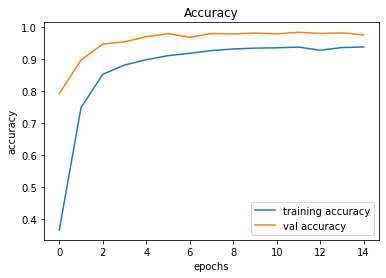

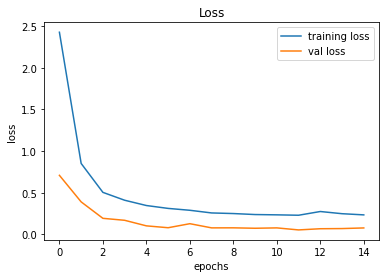

In [ ]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

# Accuracy with the test data
print(accuracy_score(labels, pred))

395/395 [==============================] - 1s 3ms/step
0.9418844022169438


In [ ]:
model.save('traffic_classifier.h5')